In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flipkart-products-dataset/flipkart data/flipkart_washing_machine.csv
/kaggle/input/flipkart-products-dataset/flipkart data/flipkart_refrigerator.csv
/kaggle/input/flipkart-products-dataset/flipkart data/flipkart_smart_watch.csv
/kaggle/input/flipkart-products-dataset/flipkart data/flipkart_tv.csv
/kaggle/input/flipkart-products-dataset/flipkart data/flipkart_laptops.csv
/kaggle/input/flipkart-products-dataset/flipkart data/flipkart_mobiles.csv


In [371]:
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.7 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [430]:
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 500
png_renderer.height = 500
import kaleido

In [86]:
import plotly.express as px 

In [63]:
wm=pd.read_csv('/kaggle/input/flipkart-products-dataset/flipkart data/flipkart_washing_machine.csv',encoding='latin1')
ref=pd.read_csv('/kaggle/input/flipkart-products-dataset/flipkart data/flipkart_refrigerator.csv',encoding='latin1')
smw=pd.read_csv('/kaggle/input/flipkart-products-dataset/flipkart data/flipkart_smart_watch.csv',encoding='latin1')
tv=pd.read_csv('/kaggle/input/flipkart-products-dataset/flipkart data/flipkart_tv.csv',encoding='latin1')
pc=pd.read_csv('/kaggle/input/flipkart-products-dataset/flipkart data/flipkart_laptops.csv',encoding='latin1')
mob=pd.read_csv('/kaggle/input/flipkart-products-dataset/flipkart data/flipkart_mobiles.csv',encoding='latin1')


In [64]:
char_remov = ['% off', ' Ra', ' R','t','i']
datas=[wm,ref,smw,tv,pc,mob]
for i in datas:
    i['Discount']=i['Discount'].str.replace('% off','')
    i['Discount']=i['Discount'].astype('int')
    i['No_of_ratings']=i['No_of_ratings'].str[0:7]
    i['No_of_ratings']=i['No_of_ratings'].str.replace(' Ra' ,'')
    i['No_of_ratings']=i['No_of_ratings'].str.replace(' R' ,'')
    i['No_of_ratings']=i['No_of_ratings'].str.replace('t' ,'')
    i['No_of_ratings']=i['No_of_ratings'].str.replace('i' ,'')
    i['No_of_ratings']=i['No_of_ratings'].str.replace('n' ,'')
    i['No_of_ratings']=i['No_of_ratings'].astype('int')


# Smart watches Analysis:

In [84]:
Top5smw=pd.pivot_table(smw,index='Name',values=['Ratings','No_of_ratings'])
Top5smw=Top5smw.sort_values(by=['No_of_ratings'],ascending=False)
Top5smw=Top5smw[Top5smw['Ratings']>4.1].head(5)
Top5smw

,No_of_ratings,Ratings
Name,,
"Noise ColorFit Caliber Smart Watch with 15-day battery 1.69"" display 60 Sports Modes Smartwatch",243784,4.2
"Noise Icon Buzz BT Calling with 1.69"" display AI Voice Assistance Built-In Games Smartwatch",169101,4.2
DIZO Watch 2 (by realme TechLife),107247,4.2
DIZO Watch 2 Sports (by realme TechLife),60177,4.2
APPLE Watch Series 3 (GPS 38mm) - Space Grey Aluminium Case with Black Sport Band,55302,4.6


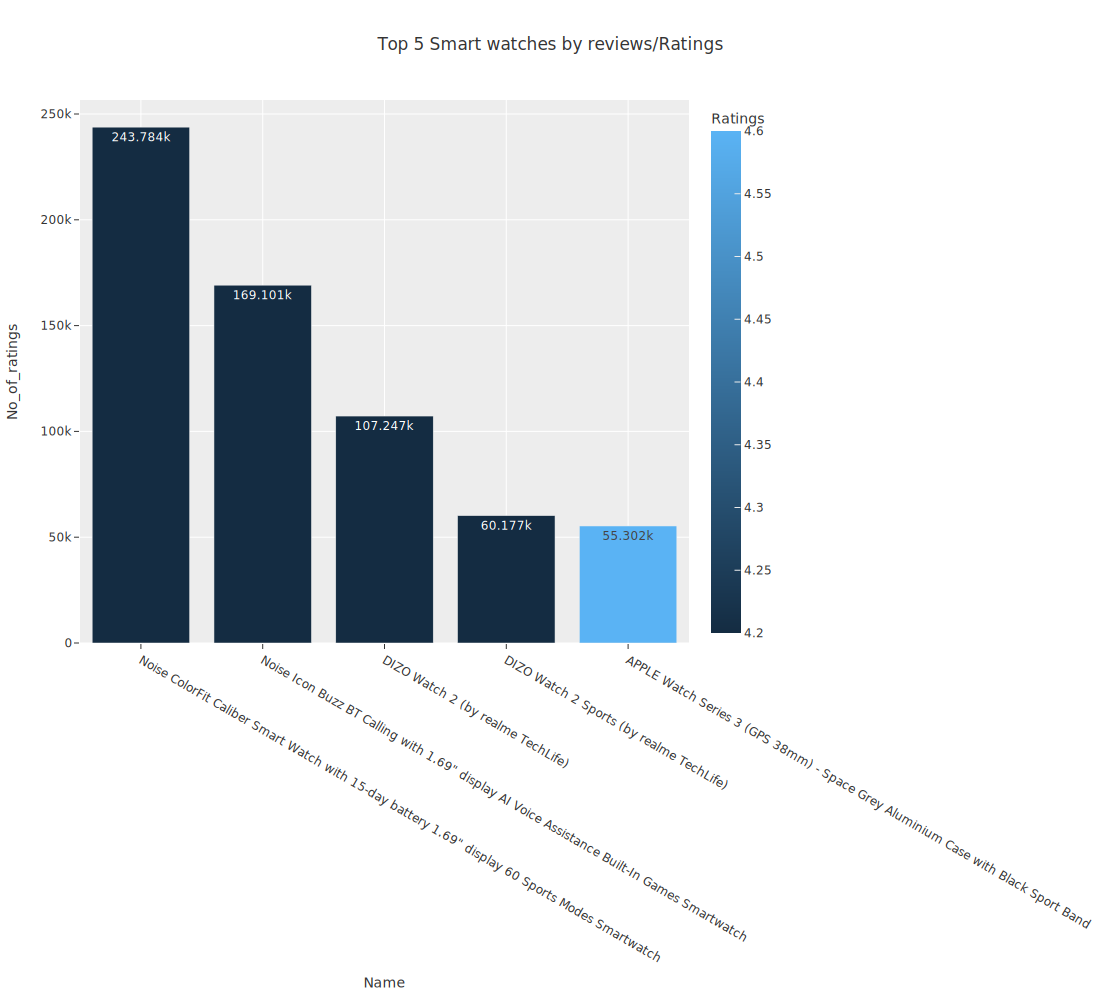

In [437]:
fig1=px.bar(Top5smw,y='No_of_ratings',color='Ratings',height=1000,width=1100,template='ggplot2',title="Top 5 Smart watches by reviews/Ratings",text_auto=True)
fig1.show(renderer="svg")

**Best smart watches products discount:**

In [115]:
dissmw=pd.pivot_table(smw,index='Name',values=['Discount'])
dissmw=dissmw.sort_values(by=['Discount'],ascending=False)
dissmw=dissmw.head(5)
dissmw

,Discount
Name,
FitPro SMART T55 CALLING WATCH WITH 44MM BRIGHT DISPLAY AND 2 TYPE OF STRAP Smartwatch,86.0
FitPro T55 Series 7 Smart Watch Enabled with Bluetooth Calling and Fitness Tracker Smartwatch,85.0
"Fire-Boltt Epic Plus with1.83"" 2.5D Curved GlassSPO2 Heart Rate tracking Touchscreen Smartwatch",85.0
Zwero T55 Series 6 Smart Watch Enabled with Bluetooth Calling and Fitness Tracker Smartwatch,84.0
THE MOBILE POINT Bluetooth Fitness Smart Watch Smartwatch,84.0


In [170]:
brandsmw=pd.pivot_table(smw,index='Brand',values=['Ratings','No_of_ratings'])
brandsmw=brandsmw.sort_values(by=['Ratings'],ascending=False,)
brandsmw=brandsmw[brandsmw['No_of_ratings']>10000].head(5)
brandsmw

,No_of_ratings,Ratings
Brand,,
APPLE,10623.285714,4.557143
Boult,37276.000000,4.300000
Ambrane,35365.000000,4.200000
Noise,38490.782609,4.134783
realme,30024.333333,4.133333


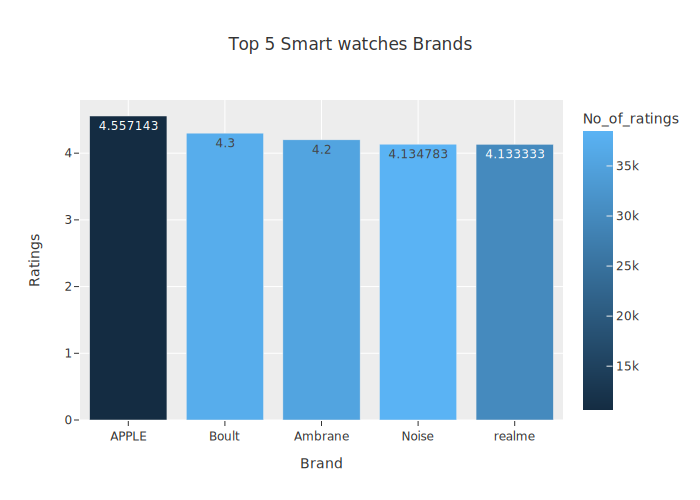

In [439]:
fig3=px.bar(brandsmw,y='Ratings',template='ggplot2',color='No_of_ratings',title="Top 5 Smart watches Brands",text_auto=True)
fig3.show(renderer="svg")

In [175]:
exsmw=pd.pivot_table(smw,index='Brand',values=['Selling Price'])
exsmw=exsmw.sort_values(by=['Selling Price'],ascending=False,)
exsmw=exsmw.head(5)
exsmw

,Selling Price
Brand,
APPLE,32713.285714
SAMSUNG,32599.000000
GARMIN,28061.428571
FOSSIL,18784.500000
Honor,11499.000000


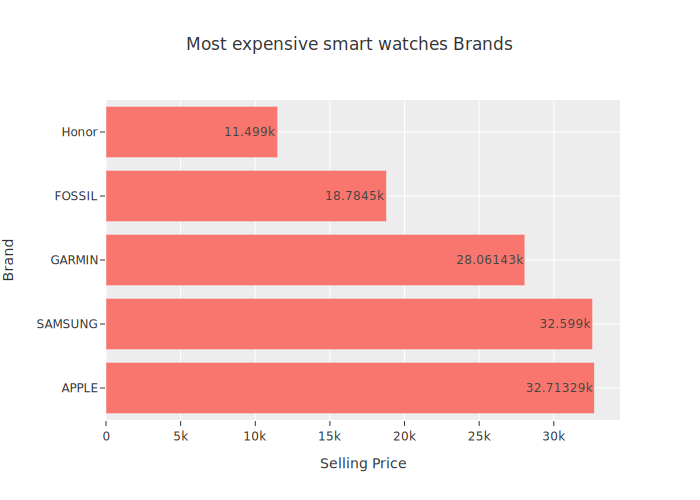

In [440]:
fig4=px.bar(exsmw,x='Selling Price',template='ggplot2',title="Most expensive smart watches Brands",text_auto=True,orientation='h')
fig4.show(renderer="svg")

# Washing machine Analysis:

In [190]:
wm.duplicated().sum()

0

In [214]:
Top5wm=pd.pivot_table(wm,index='Name',values=['Ratings','No_of_ratings'])
Top5wm=Top5wm.sort_values(by=['No_of_ratings'],ascending=False)
Top5wm=Top5wm[Top5wm['Ratings']>4.0].head(11)
Top5wm=Top5wm.drop_duplicates()
Top5wm

,No_of_ratings,Ratings
Name,,
SAMSUNG 6.5 kg 5 Star Inverter with Diamond Drum Fully Automatic Top Load Grey,73967.0,4.4
Whirlpool 6 kg 5 StarTurbo Scrub Technology Semi Automatic Top Load Grey,66571.0,4.4
MarQ by Flipkart 6.5 kg 5 Star Rating Semi Automatic Top Load White Blue,53562.0,4.3
ONIDA 7 kg with 5 Star Fully Automatic Top Load Grey,43250.0,4.2
Whirlpool 7 kg with Hard Water Wash Fully Automatic Top Load Grey,30745.0,4.3


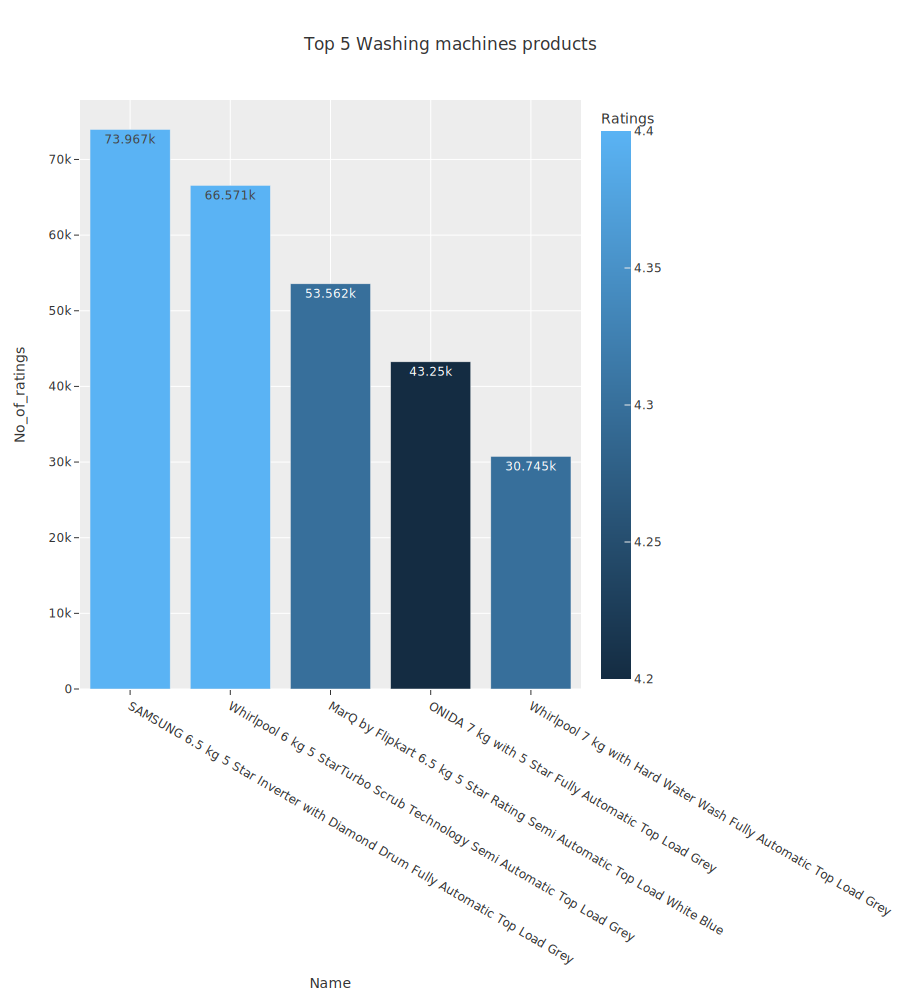

In [456]:
fig5=px.bar(Top5wm,y='No_of_ratings',color='Ratings',template='ggplot2',height=1000,width=900,title="Top 5 Washing machines products",text_auto=True)
fig5.show(renderer="svg")

**Best waching machines products discount:**

In [455]:
diswm=pd.pivot_table(wm,index='Name',values=['Discount'])
diswm=diswm.sort_values(by=['Discount'],ascending=False)
diswm=diswm.head(5)
diswm

,Discount
Name,
realme TechLife 8 kg 5 Star Smart Wi-Fi Enabled Inverter Technology Garment Sterilization Fully Automa...,46.0
Voltas Beko 9 kg Fully Automatic Top Load Grey,44.0
realme TechLife 8.5 kg with Semi Automatic Top Load Grey Black,43.0
BOSCH 7 kg Semi Automatic Top Load Grey,43.0
White Westinghouse (Trademark by Electrolux) 10.5 kg Fully Automatic Front Load with In-built Heater W...,43.0


In [224]:
exwm=pd.pivot_table(wm,index='Brand',values=['Selling Price'])
exwm=exwm.sort_values(by=['Selling Price'],ascending=False,)
exwm=exwm.head(5)


,Selling Price
Brand,
Samsung,109090.000000
IFB,31107.764706
BOSCH,30383.318182
Galanz,27823.333333
LG,25701.777778


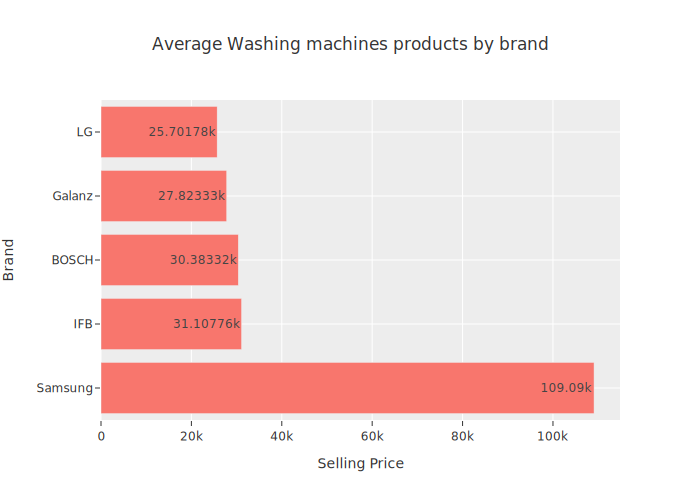

In [457]:
fig7=px.bar(exwm,x='Selling Price',template='ggplot2',title="Average Washing machines products by brand",text_auto=True,orientation='h')
fig7.show(renderer="svg")

# TV analsyis:

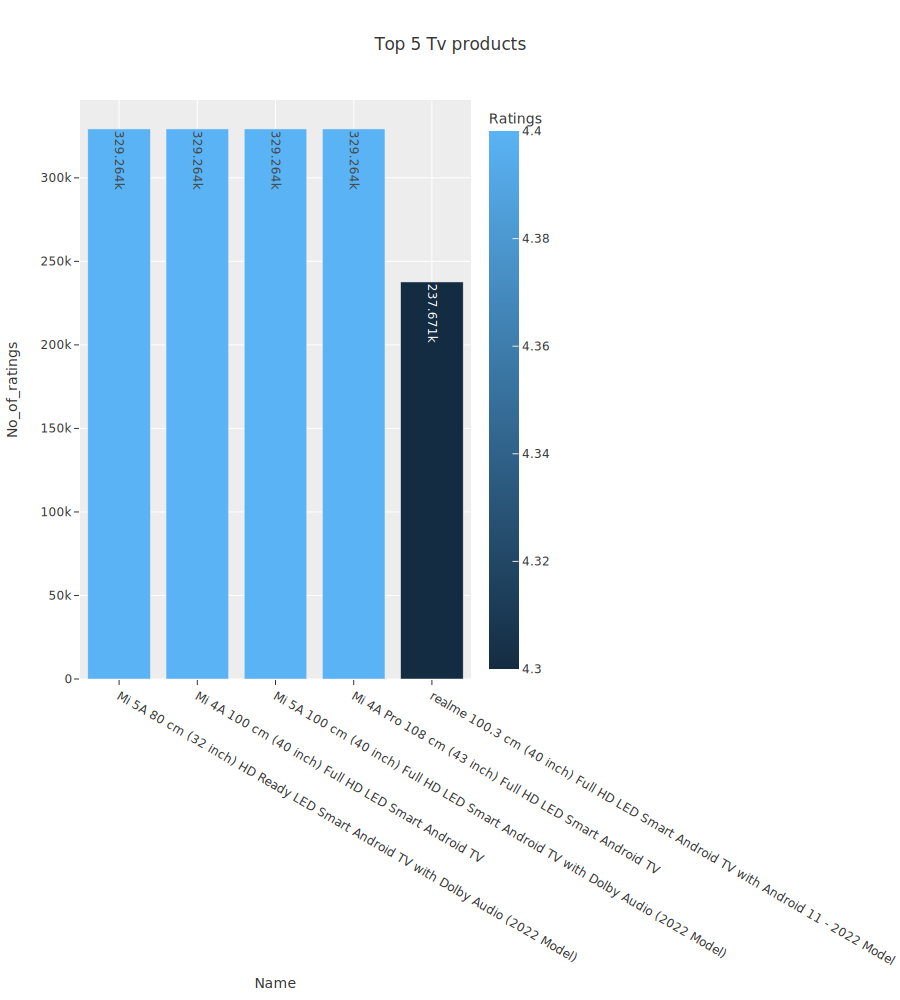

In [444]:
Top5tv=pd.pivot_table(tv,index='Name',values=['Ratings','No_of_ratings'])
Top5tv=Top5tv.sort_values(by=['No_of_ratings'],ascending=False)
Top5tv=Top5tv[Top5tv['Ratings']>4.1].head(5)
fig8=px.bar(Top5tv,y='No_of_ratings',color='Ratings',template='ggplot2',height=1000,width=900,title="Top 5 Tv products",text_auto=True)
fig8.show(renderer="svg")

In [231]:
extv=pd.pivot_table(tv,index='Brand',values=['Selling Price'])
extv=extv.sort_values(by=['Selling Price'],ascending=False,)
extv=extv.head(5)


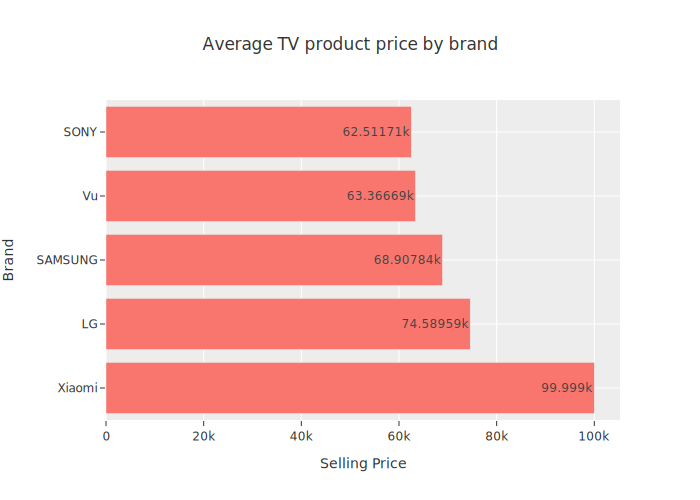

In [445]:
fig9=px.bar(extv,x='Selling Price',template='ggplot2',title="Average TV product price by brand",text_auto=True,orientation='h')
fig9.show(renderer="svg")

# Refrigerators analysis:

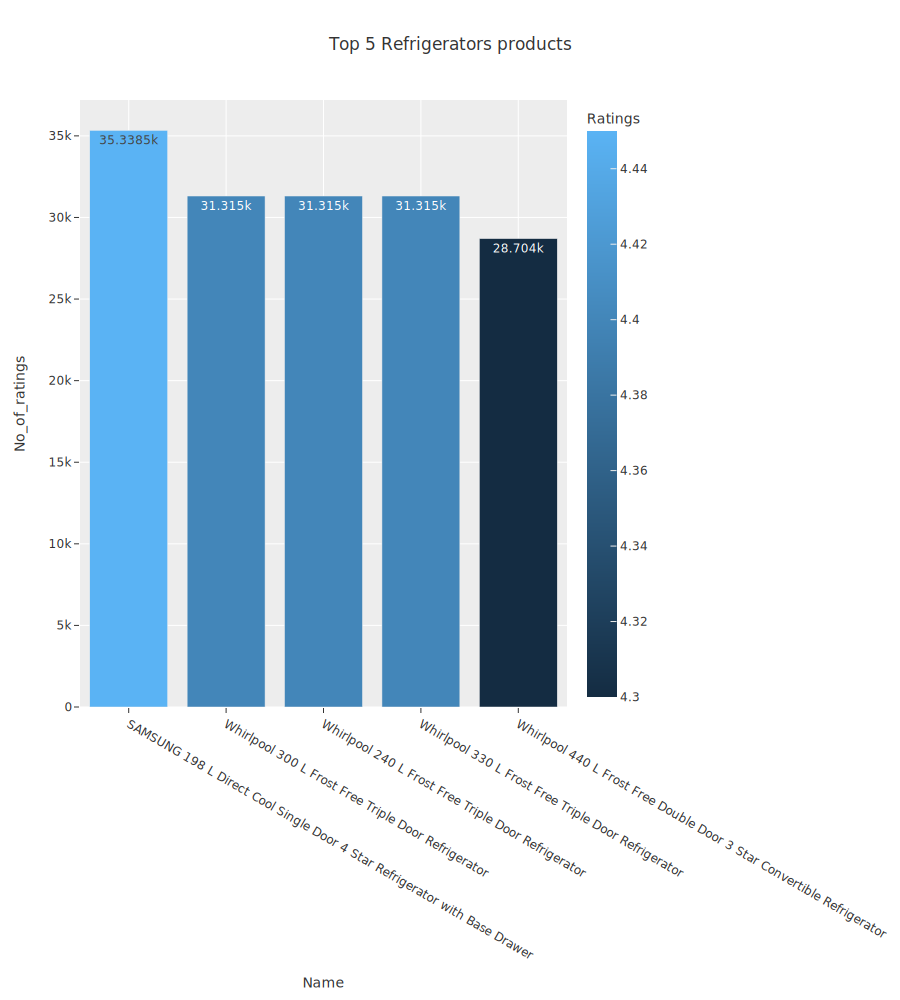

In [446]:
Top5ref=pd.pivot_table(ref,index='Name',values=['Ratings','No_of_ratings'])
Top5ref=Top5ref.sort_values(by=['No_of_ratings'],ascending=False)
Top5ref=Top5ref[Top5ref['Ratings']>4.0].head(5)
fig10=px.bar(Top5ref,y='No_of_ratings',template='ggplot2',color='Ratings',height=1000,width=900,title="Top 5 Refrigerators products",text_auto=True)
fig10.show(renderer="svg")

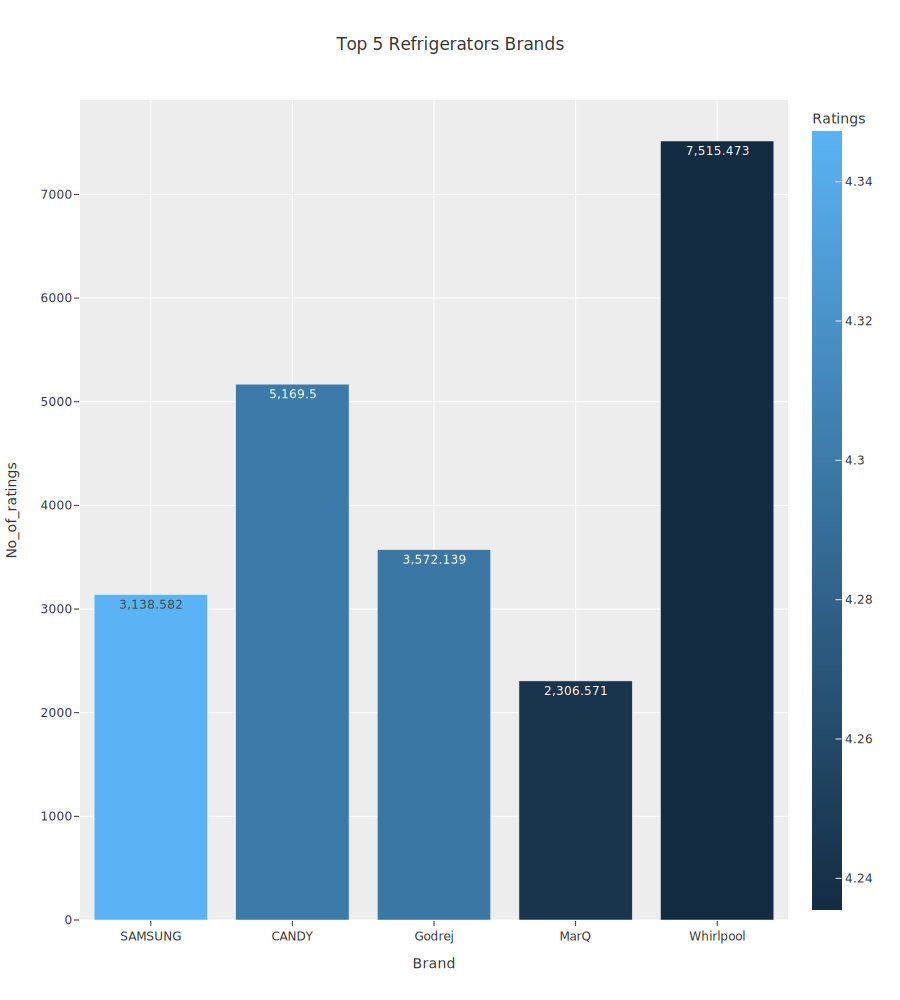

In [447]:
brandref=pd.pivot_table(ref,index='Brand',values=['Ratings','No_of_ratings'])
brandref=brandref.sort_values(by=['Ratings'],ascending=False,)
brandref=brandref[brandref['No_of_ratings']>2000].head(5)
fig11=px.bar(brandref,y='No_of_ratings',template='ggplot2',color='Ratings',height=1000,width=900,title="Top 5 Refrigerators Brands",text_auto=True)
fig11.show(renderer="svg")

# Mobiles analysis:

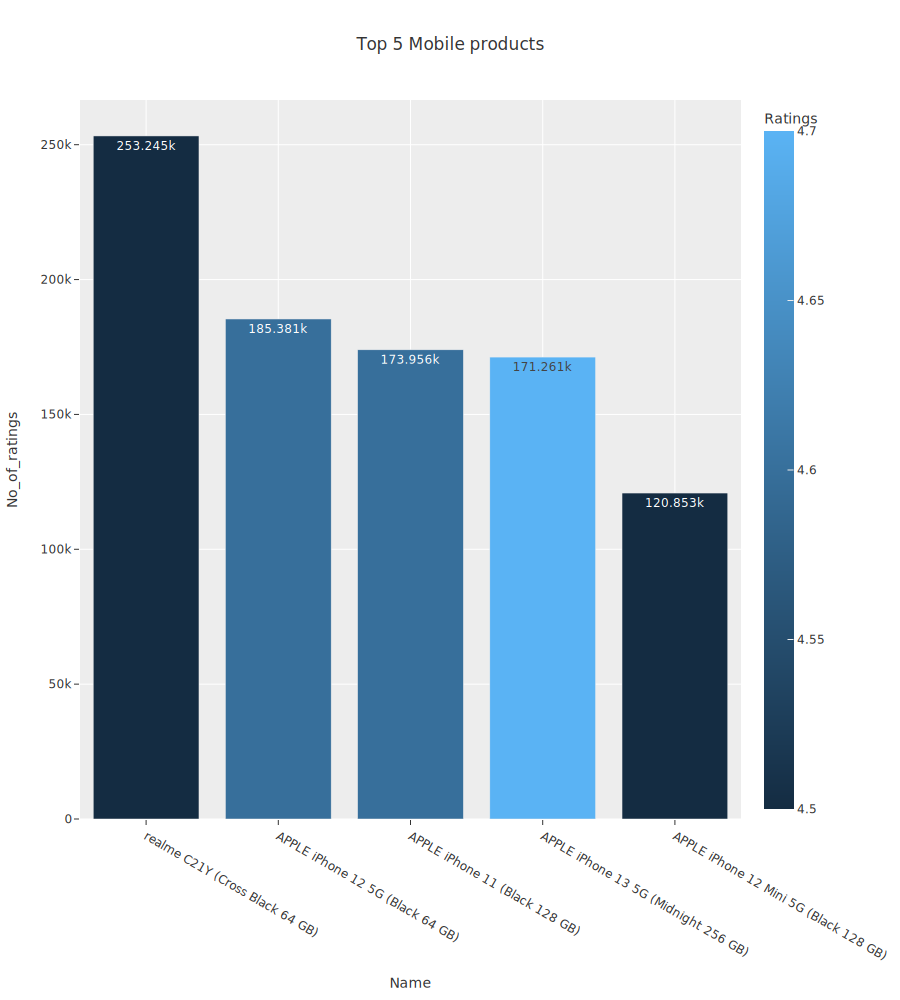

In [448]:
Top5mob=pd.pivot_table(mob,index='Name',values=['Ratings','No_of_ratings'])
Top5mob=Top5mob.sort_values(by=['No_of_ratings'],ascending=False)
Top5mob=Top5mob.drop_duplicates()
Top5mob=Top5mob[Top5mob['Ratings']>4.4].head(5)
fig12=px.bar(Top5mob,y='No_of_ratings',color='Ratings',template='ggplot2',height=1000,width=900,title="Top 5 Mobile products",text_auto=True)
fig12.show(renderer="svg")

In [270]:
mob['Brand']=mob['Brand'].str.replace('realme','Realme')

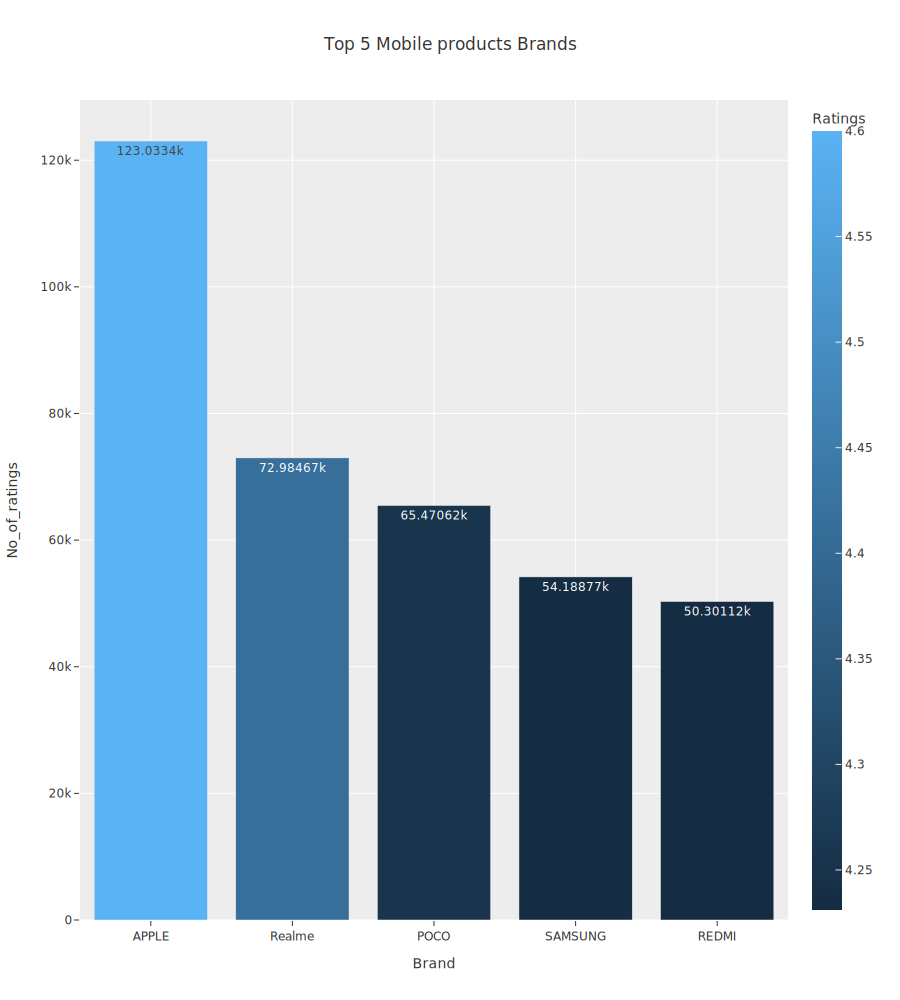

In [449]:
brandmob=pd.pivot_table(mob,index='Brand',values=['Ratings','No_of_ratings'])
brandmob=brandmob.sort_values(by=['Ratings'],ascending=False,)
brandmob=brandmob[brandmob['No_of_ratings']>30000].head(5)
fig13=px.bar(brandmob,y='No_of_ratings',template='ggplot2',color='Ratings',height=1000,width=900,title="Top 5 Mobile products Brands",text_auto=True)
fig13.show(renderer="svg")

# Laptops analysis:

**Top 5 Laptop products:**

In [282]:
Top5pc=pd.pivot_table(pc,index='Name',values=['Ratings','No_of_ratings'])
Top5pc=Top5pc.sort_values(by=['No_of_ratings'],ascending=False)
Top5pc=Top5pc[Top5pc['Ratings']>4.1].head(5)
Top5pc

,No_of_ratings,Ratings
Name,,
acer Predator Helios 300 Core i5 8th Gen - (8 GB/1 TB HDD/128 GB SSD/Windows 10 Home/4 GB Graphics/NVI...,13095.0,4.6
realme Book (Slim) Core i3 11th Gen - (8 GB/256 GB SSD/Windows 10 Home) RMNB1001 Thin and Light Laptop,11894.0,4.4
ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-BQ322WS Thin and L...,8727.0,4.3
ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...,8727.0,4.3
APPLE MacBook Air M1 - (8 GB/512 GB SSD/Mac OS Big Sur) Z12400092,8401.0,4.7


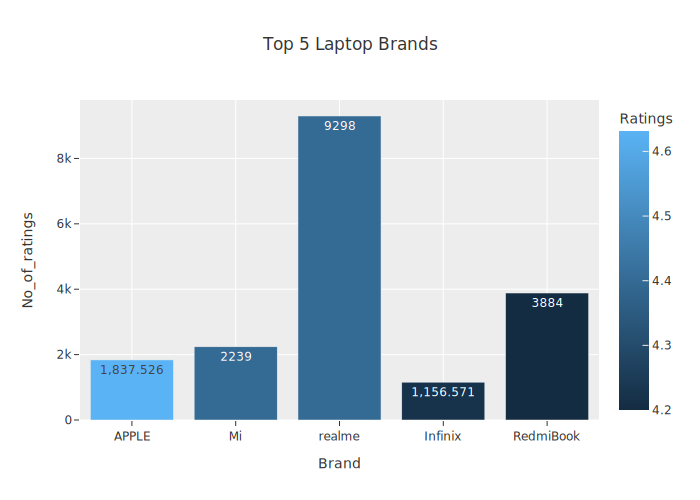

In [450]:
brandpc=pd.pivot_table(pc,index='Brand',values=['Ratings','No_of_ratings'])
brandpc=brandpc[brandpc['No_of_ratings']>1100].head(5)
brandpc=brandpc.sort_values(by=['Ratings'],ascending=False)
fig14=px.bar(brandpc,y='No_of_ratings',template='ggplot2',color='Ratings',title="Top 5 Laptop Brands",text_auto=True)
fig14.show(renderer="svg")

# All products analysis:
# 

In [340]:
df = pd.concat([wm,smw,pc,tv,ref,mob], ignore_index=True, sort=False)

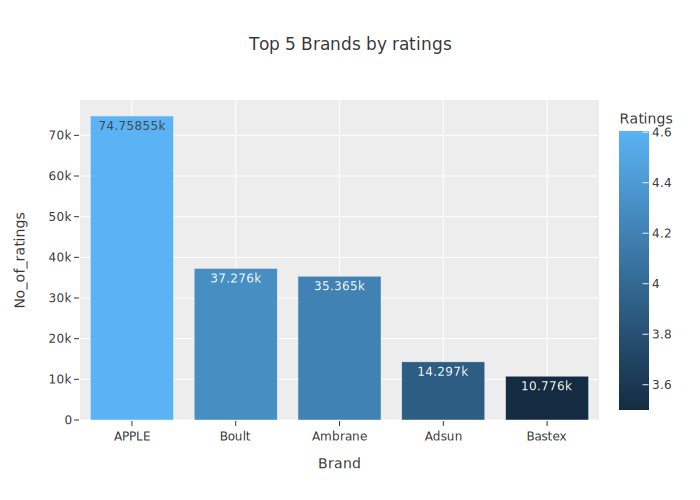

In [451]:
brand=pd.pivot_table(df,index='Brand',values=['Ratings','No_of_ratings'])
brand=brand[brand['No_of_ratings']>10000].head(5)
brand=brand.sort_values(by=['Ratings'],ascending=False)
fig15=px.bar(brand,y='No_of_ratings',color='Ratings',template='ggplot2',title="Top 5 Brands by ratings",text_auto=True)
fig15.show(renderer="svg")

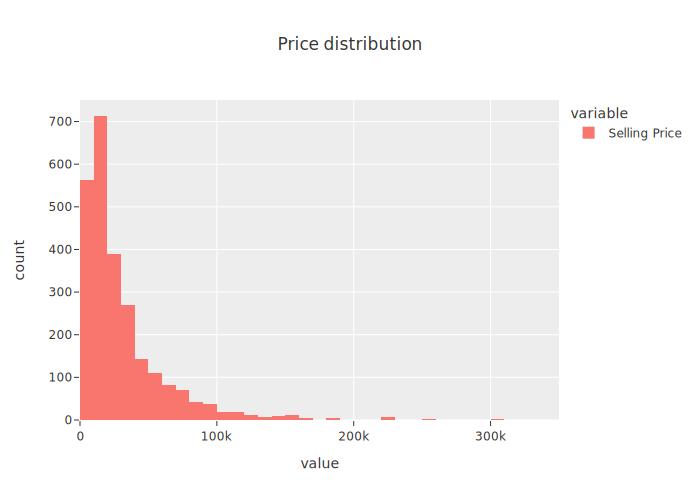

In [452]:
fig16=px.histogram(df['Selling Price'],nbins=45,template='ggplot2',title='Price distribution')
fig16.show(renderer="svg")

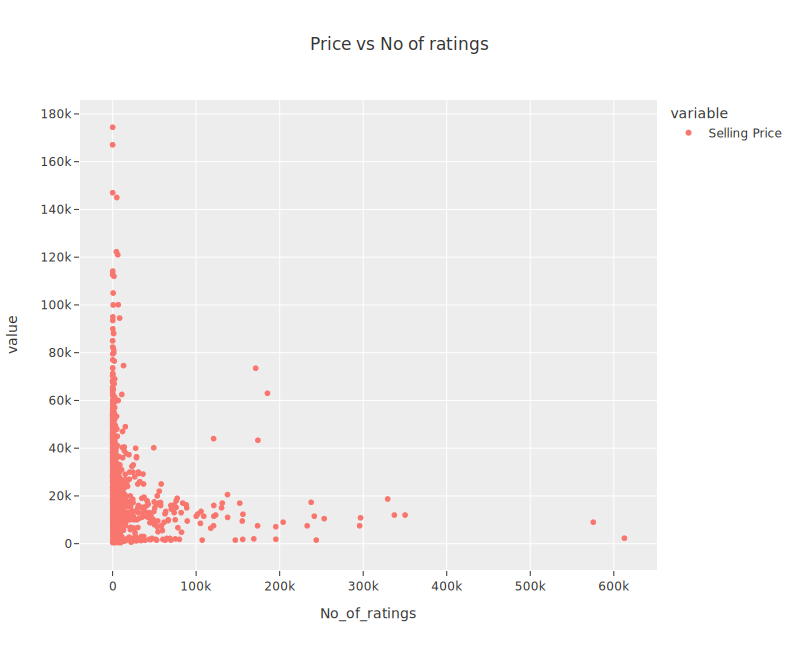

In [460]:
pr=pd.pivot_table(df,index='No_of_ratings',values='Selling Price',aggfunc='mean')
fig17=px.scatter(pr,template='ggplot2',title='Price vs No of ratings',height=650,width=800)
fig17.show(renderer="svg")

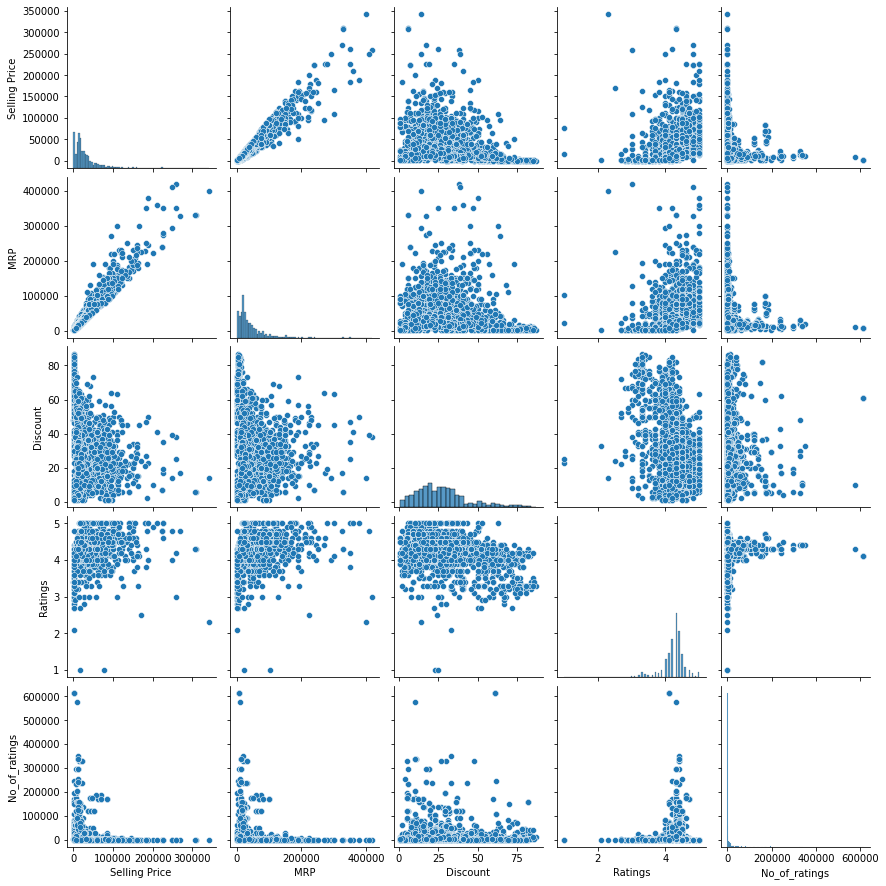

In [368]:
sns.pairplot(df)

<AxesSubplot:>

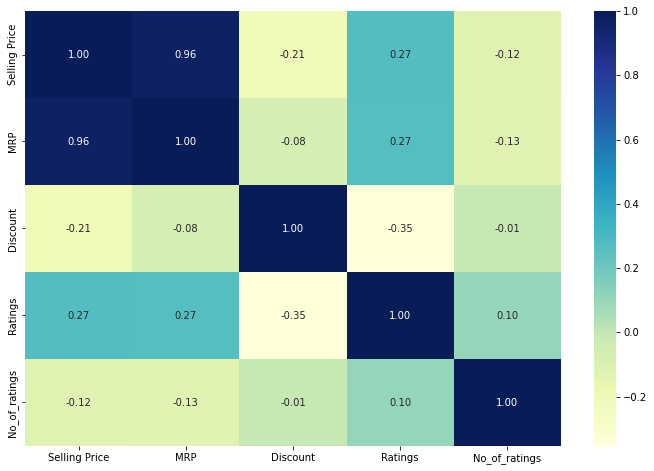

In [398]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')


In [344]:
df.info(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           2525 non-null   object 
 1   Brand          2525 non-null   object 
 2   Selling Price  2525 non-null   int64  
 3   MRP            2525 non-null   int64  
 4   Discount       2525 non-null   int64  
 5   Ratings        2525 non-null   float64
 6   No_of_ratings  2525 non-null   int64  
 7   Details        2525 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 157.9+ KB


**Thank you for your visit! If you like this notebook, don't forget to upvote it! Thank you again!**